1. PROBLEM IDENTIFICATION

The problem to be solved is to predict a customer's deposit probability based on various features. Banks can benefit from this solution by streamlining operations, improving marketing campaigns, reducing risk, and increasing customer deposits.

###  IMPORT LIBRARIES

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from collections import Counter

# for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### LOAD THE DATASET

In [2]:

df = pd.read_csv(r"C:\Users\USER\Downloads\bank.csv")

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.shape

(45211, 17)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


###  EXPLORATORY DATA ANALYSIS

In [8]:
# Numerical statistical analysis
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# Categorical statistical analysis
df.describe(include=["object", "bool"])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [10]:
# investigate the missing data

null_vals = df.isnull().sum()
null_vals

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<AxesSubplot:>

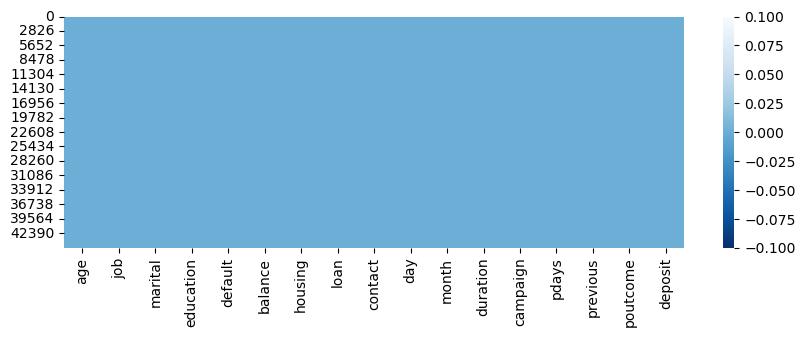

In [11]:
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

2a. Visualize relationships between labels and some key features

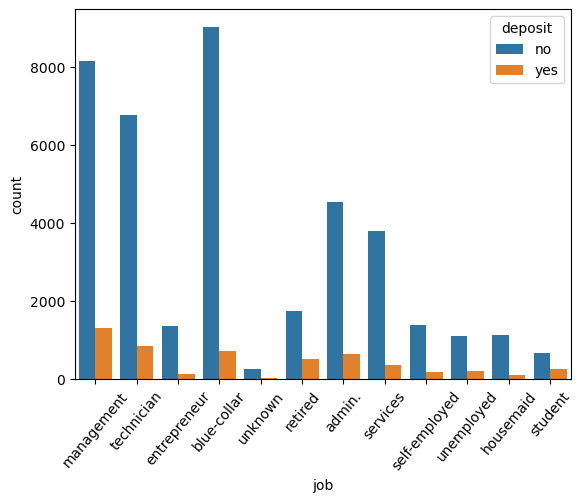

In [12]:
sns.countplot(x='job', hue='deposit', data=df)
plt.xticks(rotation=50)
plt.show()

Observation- Customers that their job is in Management, technician, entrepreneur, and admin are the ones that deposited the most and entrepreneurs, management, technician and admin had most people that didnt make any deposit

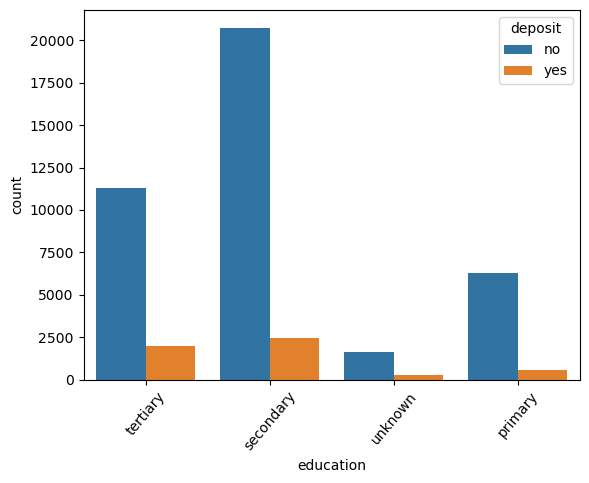

In [13]:
sns.countplot(x='education', hue='deposit', data=df)
plt.xticks(rotation=50)
plt.show()

Observation - Customers with secondary education did the highest deposit and also had the highest number with no deposit

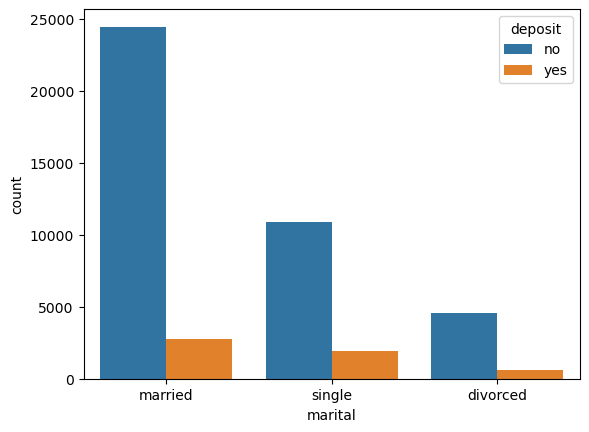

In [14]:
sns.countplot(x='marital', hue='deposit', data=df)
plt.show()

Observation - Married customers had the highest number of people who deposit and also who didnt deposit at all

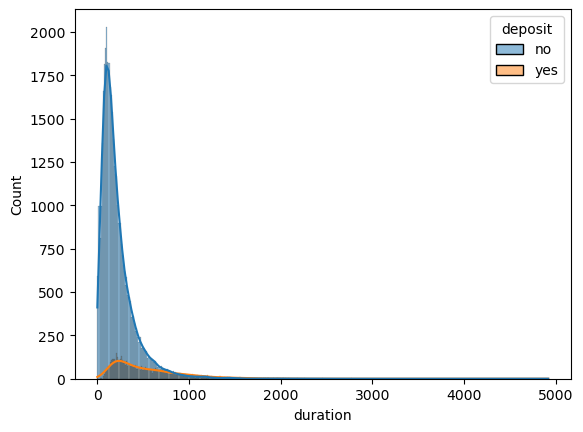

In [15]:
sns.histplot(data=df, x='duration', hue='deposit', kde=True)
plt.show()

Positively skewed

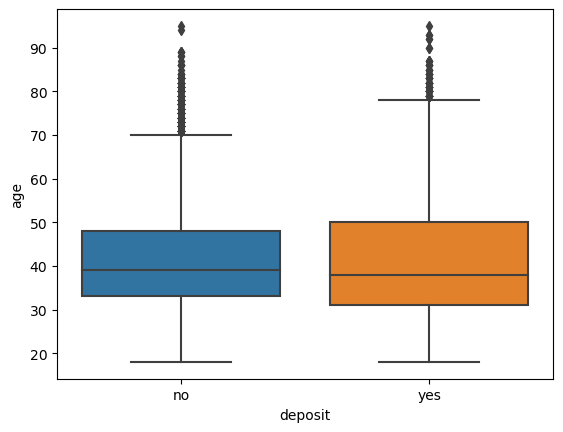

In [16]:
sns.boxplot(x='deposit', y='age', data=df)
plt.show()

It is observed that customers between ages 30 to 50 are the ones that deposited though we have outliers


2B. Correlation

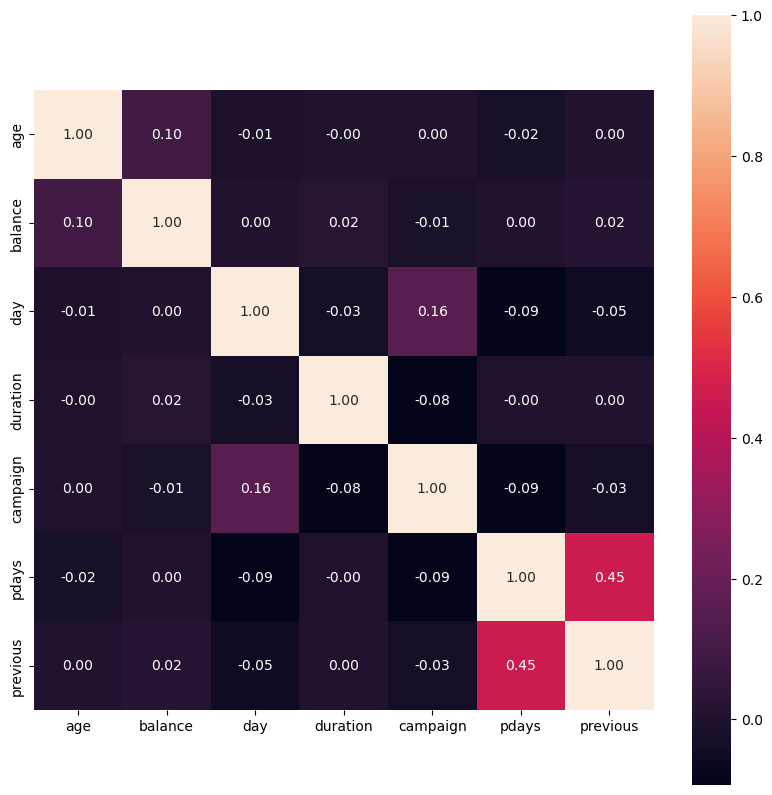

In [17]:
plt.figure(figsize = (10,10))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10})

In [18]:
#New feature

# Group customer's age
def age_group(x):
    if x <=37:
        return "<= 37 Youth"
    elif x <=57:
        return "38-57 Adult"
    elif x <=77:
        return "58-77 Old Adult"
    else:
        return ">=77 Elderly"

In [19]:
# Apply function to data
df["age_group"] = df["age"].apply(age_group)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,58-77 Old Adult
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,38-57 Adult
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,<= 37 Youth
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,38-57 Adult
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,<= 37 Youth


2C. Univariate and Bivariate Analysis

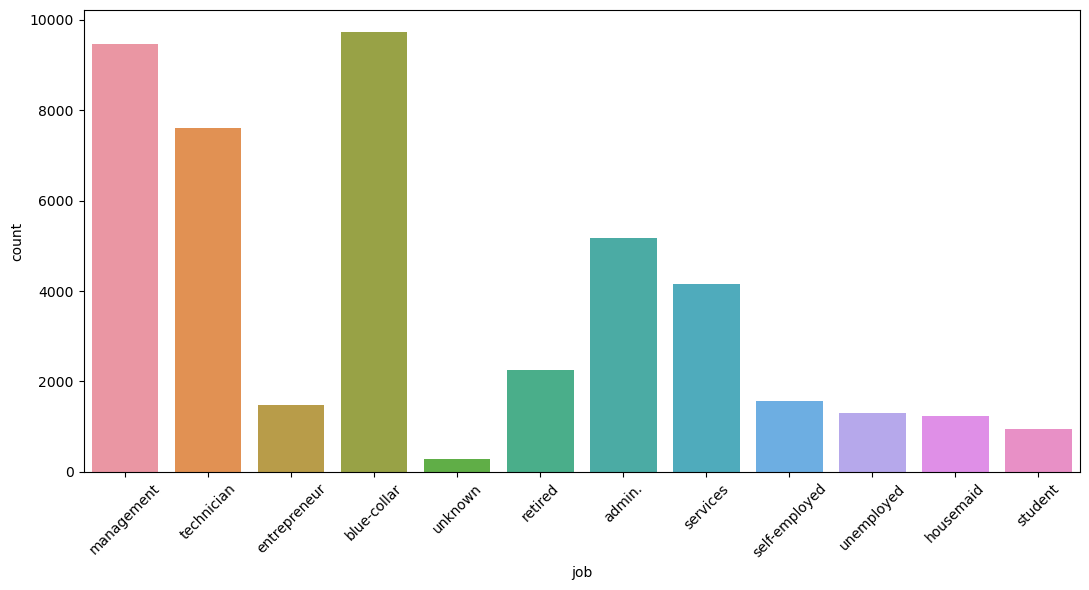

In [20]:
plt.figure(figsize=(11, 6))
sns.countplot(x="job", data=df)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [ ]:
It is observed that the highest number of customers the bank targetted have blue-collar jobs

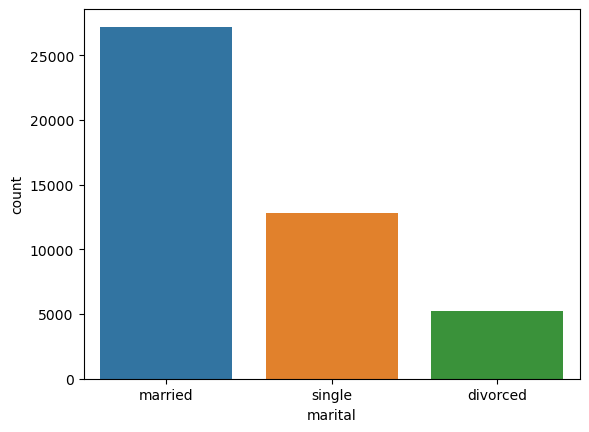

In [21]:
sns.countplot(x="marital", data=df);

The highest number of the customers are married

In [22]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

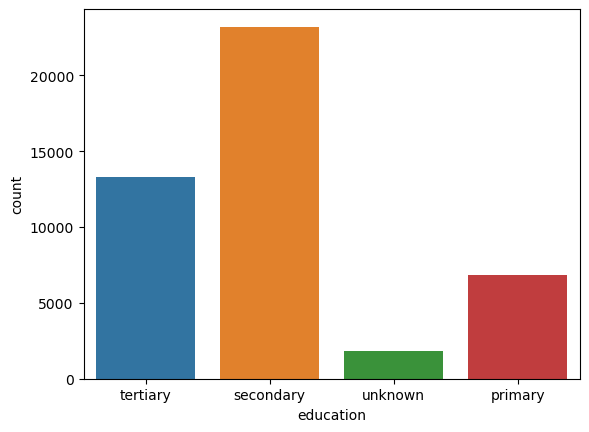

In [23]:
sns.countplot(x="education", data=df);

The highest number of customers of Nexux Bank have a secondary education

In [24]:
df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

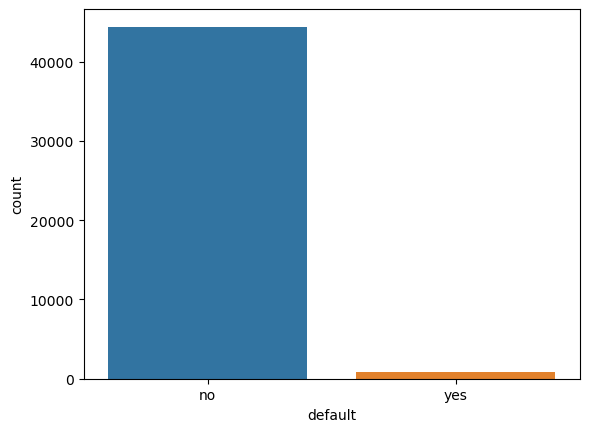

In [25]:
sns.countplot(x="default", data=df);

Almost all customers that took a loan or credit card payment defaulted

In [26]:
df["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

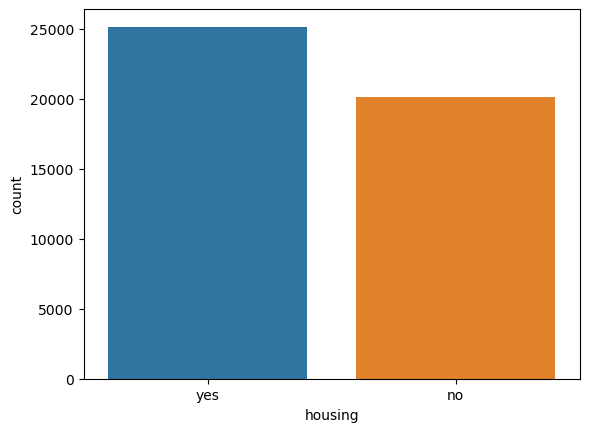

In [27]:
sns.countplot(x="housing", data=df);

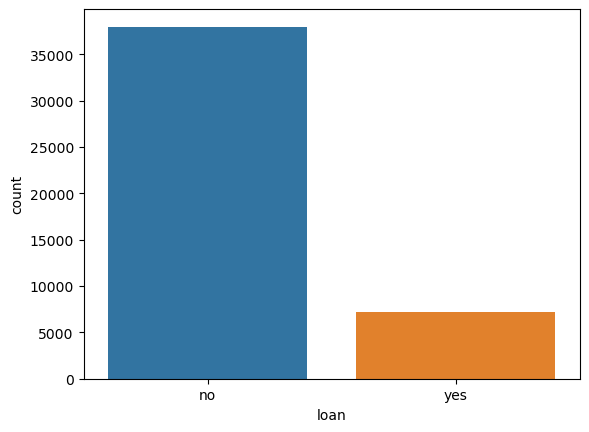

In [28]:
sns.countplot(x="loan", data=df);

This indicates that majority of customers didnt take a loan

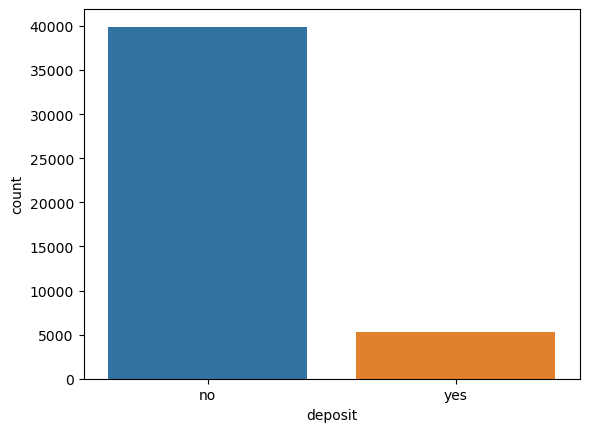

In [29]:
sns.countplot(x="deposit", data=df);

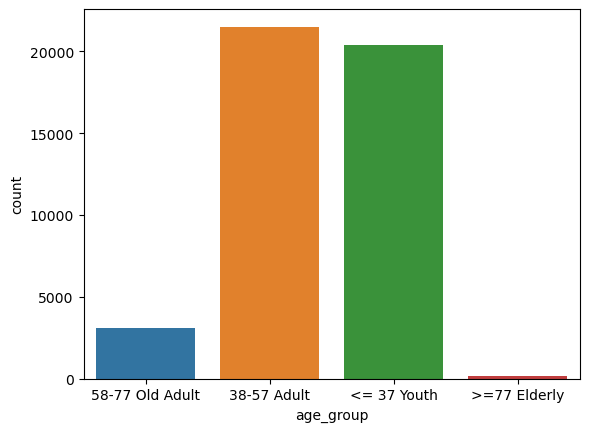

In [30]:
sns.countplot(x="age_group", data=df);

This indicates that the majority of the bank customers are adults

In [31]:
df["age_group"].value_counts()

38-57 Adult        21508
<= 37 Youth        20409
58-77 Old Adult     3109
>=77 Elderly         185
Name: age_group, dtype: int64

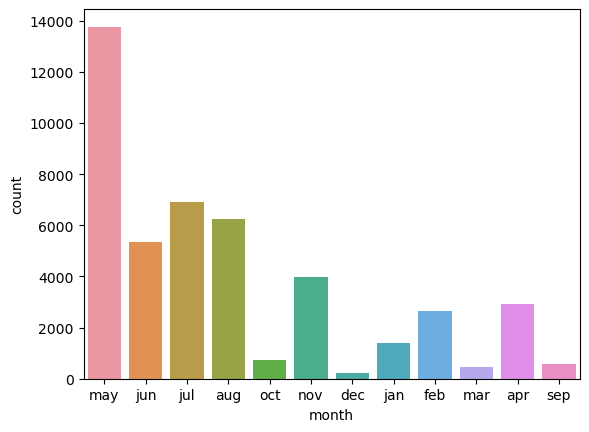

In [32]:
sns.countplot(x="month", data=df);

It is observed that majority of the bank's customers were contacted last in may

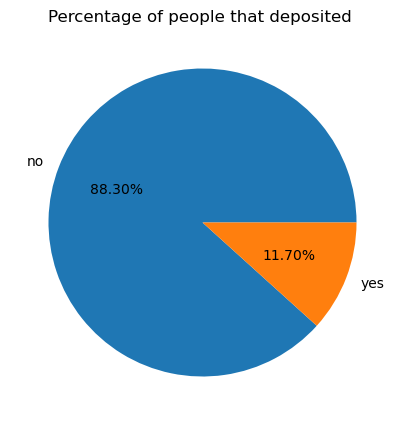

In [33]:
# percentage of people that deposited

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["deposit"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of people that deposited ")
plt.show();

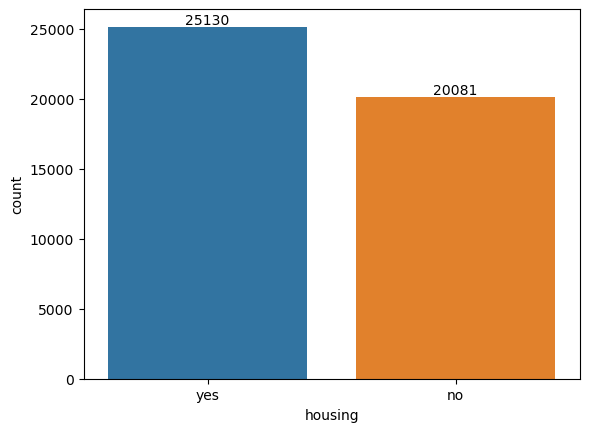

In [34]:
ax = sns.countplot(x=df["housing"], order=df["housing"].value_counts(ascending=False).index)
values = df["housing"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

It is observed that most 25130 customer took a housing loan

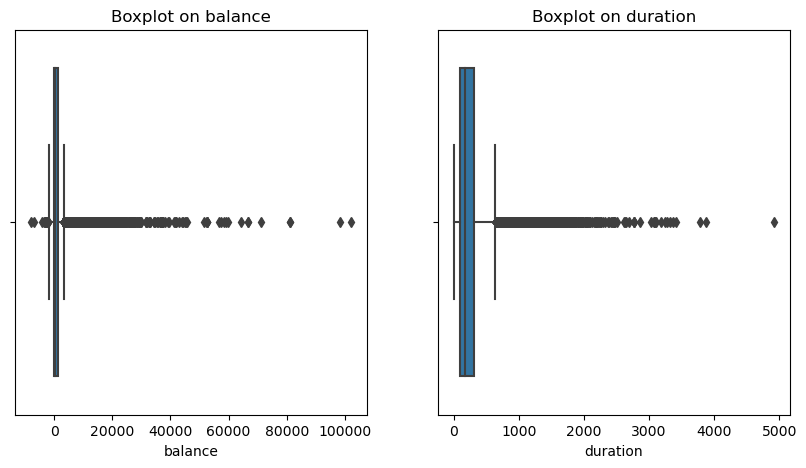

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.boxplot(x="balance", data=df, ax=axs[0])
axs[0].set_title("Boxplot on balance")

sns.boxplot(x="duration", data=df, ax=axs[1])
axs[1].set_title("Boxplot on duration");

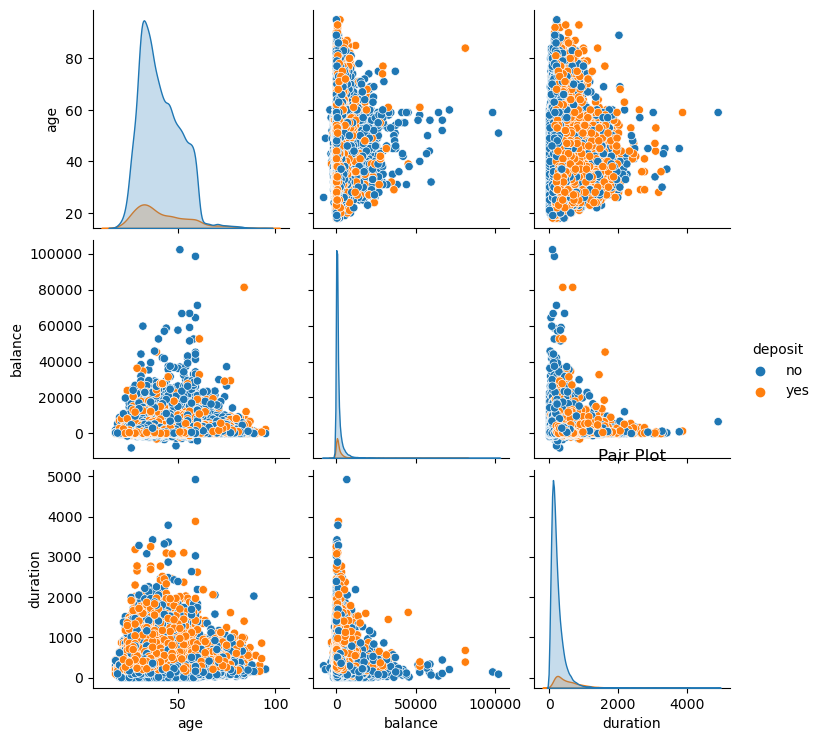

In [36]:
# Multivariate 

sns.pairplot(data=df, vars=['age', 'balance', 'duration'], hue='deposit')
plt.title('Pair Plot')
plt.show()

### FEATURE ENGINEERING

In [37]:
df['default'] = df['default'].map({'yes':1, 'no':0})
df['housing'] = df['housing'].map({'yes':1, 'no':0})
df['loan'] = df['loan'].map({'yes':1, 'no':0})
df['deposit'] = df['deposit'].map({'yes':1, 'no':0})
df['marital'] = df['marital'].map({'divorced':2, 'married':1, 'single':0})
df['education'] = df['education'].map({'tertiary':3, 'secondary':2, 'primary':1, 'no':0})
df['job'] = df['job'].map({'blue-collar':11, 'management':10, 'technician':9, 'admin':8,'services':7,'retired':6, 'self-employed':5, 'entrepreneur':4, 'unemployed':3, 'housemaid':2, 'student':1, 'unknown':0})
df['poutcome'] = df['poutcome'].map({'other':3, 'failure':2, 'success':1, 'unknown':0})
df['month'] = df['month'].map({'dec':11, 'nov':10, 'oct':9, 'sep':8,'aug':7,'jul':6, 'jun':5, 'may':4, 'apr':3, 'mar':2, 'feb':1, 'jan':0})
df['contact'] = df['contact'].map({'cellular':2, 'telephone':1, 'unknown':0})

This code is to convert the categorical variable to numerical using one hot encoding

In [39]:
df.dtypes

age            int64
job          float64
marital        int64
education    float64
default        int64
balance        int64
housing        int64
loan           int64
contact        int64
day            int64
month          int64
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome       int64
deposit        int64
age_group     object
dtype: object

In [40]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,58,10.0,1,3.0,0,2143,1,0,0,5,4,261,1,-1,0,0,0,58-77 Old Adult
1,44,9.0,0,2.0,0,29,1,0,0,5,4,151,1,-1,0,0,0,38-57 Adult
2,33,4.0,1,2.0,0,2,1,1,0,5,4,76,1,-1,0,0,0,<= 37 Youth
3,47,11.0,1,NaN,0,1506,1,0,0,5,4,92,1,-1,0,0,0,38-57 Adult
4,33,0.0,0,NaN,0,1,0,0,0,5,4,198,1,-1,0,0,0,<= 37 Youth
5,35,10.0,1,3.0,0,231,1,0,0,5,4,139,1,-1,0,0,0,<= 37 Youth
6,28,10.0,0,3.0,0,447,1,1,0,5,4,217,1,-1,0,0,0,<= 37 Youth
7,42,4.0,2,3.0,1,2,1,0,0,5,4,380,1,-1,0,0,0,38-57 Adult
8,58,6.0,1,1.0,0,121,1,0,0,5,4,50,1,-1,0,0,0,58-77 Old Adult
9,43,9.0,0,2.0,0,593,1,0,0,5,4,55,1,-1,0,0,0,38-57 Adult


In [44]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
age_group    0
dtype: int64

In [43]:
# replace missing values in job and education with zero

df['job'] = df['job'].fillna(0).astype(int)
df['education'] = df['education'].fillna(0).astype(int)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  int32 
 2   marital    45211 non-null  int64 
 3   education  45211 non-null  int32 
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  int64 
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int64 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  int64 
 16  deposit    45211 non-null  int64 
 17  age_group  45211 non-null  object
dtypes: int32(2), int64(15), object(1)
memory usage: 5.9+ MB


### MODELLING

In [46]:
# split the feature from the target

df1  =df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]
label =df[['deposit']]

In [47]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,10,1,3,0,2143,1,0,0,5,4,261,1,-1,0,0
1,44,9,0,2,0,29,1,0,0,5,4,151,1,-1,0,0
2,33,4,1,2,0,2,1,1,0,5,4,76,1,-1,0,0
3,47,11,1,0,0,1506,1,0,0,5,4,92,1,-1,0,0
4,33,0,0,0,0,1,0,0,0,5,4,198,1,-1,0,0


In [48]:
label.head()

,deposit
0,0
1,0
2,0
3,0
4,0


In [50]:
# Classifiers Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

!pip install xgboost

# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [49]:
# train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=45)

In [51]:
y_train.head(3)

,deposit
39502,0
24747,0
32523,0


In [52]:
X_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6367,28,3,1,2,0,863,1,1,0,27,4,355,1,-1,0,0
8215,46,9,1,2,0,-59,1,1,0,2,5,117,2,-1,0,0
19376,57,9,1,3,0,624,0,0,2,6,7,224,4,-1,0,0
37998,27,0,0,2,0,54,1,0,2,14,4,252,2,-1,0,0
41843,83,6,2,1,0,2619,0,0,1,16,9,181,2,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,45,10,1,3,0,96,1,0,2,16,6,202,1,-1,0,0
661,45,7,1,2,0,1259,1,0,0,6,4,507,1,-1,0,0
15486,36,10,2,3,0,18,1,0,2,18,6,180,2,-1,0,0
1189,56,10,2,3,0,177,1,0,0,8,4,1040,1,-1,0,0


In [53]:
# Model Building

# logistic regression

LR = LogisticRegression()

LR.fit(X_train, y_train)

ly_pred = LR.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:",  f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8870949906004645
Precision: 0.5398773006134969
Recall: 0.16809933142311365
F1-score: 0.25637290604515656
AUC-ROC: 0.5746699758666344


ANALYSIS
-The accuracy is at 87% which means that the prediction from the LR model can be relied upon, which in turn can be useful in identifying the potential depositors

-LR model was able to correctly identify about 54% of the predicted deposits with precision. This metric is valuable to the Bank as it helps identify potential customers who are more likely to deposit, allowing them to focus their marketing efforts on these people and optimize their operations appropriately.

-The LR model identified 16.8% recall value of the actual deposit. This is very low as higher recall requirements are important for the Bank to ensure they don't run out of potential depositors. By accurately identifying larger deposits, banks can design targeted marketing campaigns and improve their customer acquisition program.  

-F1 score is at 26% this implies that the model strikes a balance between correctly predicting deposits and minimizing false positives.

-AUC-ROC score is at 58%. Improving the AUC-ROC score can help better identify potential depositors and improve their performance. 
 

In [54]:
X_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6367,28,3,1,2,0,863,1,1,0,27,4,355,1,-1,0,0
8215,46,9,1,2,0,-59,1,1,0,2,5,117,2,-1,0,0
19376,57,9,1,3,0,624,0,0,2,6,7,224,4,-1,0,0
37998,27,0,0,2,0,54,1,0,2,14,4,252,2,-1,0,0
41843,83,6,2,1,0,2619,0,0,1,16,9,181,2,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,45,10,1,3,0,96,1,0,2,16,6,202,1,-1,0,0
661,45,7,1,2,0,1259,1,0,0,6,4,507,1,-1,0,0
15486,36,10,2,3,0,18,1,0,2,18,6,180,2,-1,0,0
1189,56,10,2,3,0,177,1,0,0,8,4,1040,1,-1,0,0


In [55]:
ly_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
y_test

,deposit
6367,0
8215,0
19376,0
37998,0
41843,0
...,...
14856,0
661,0
15486,0
1189,0


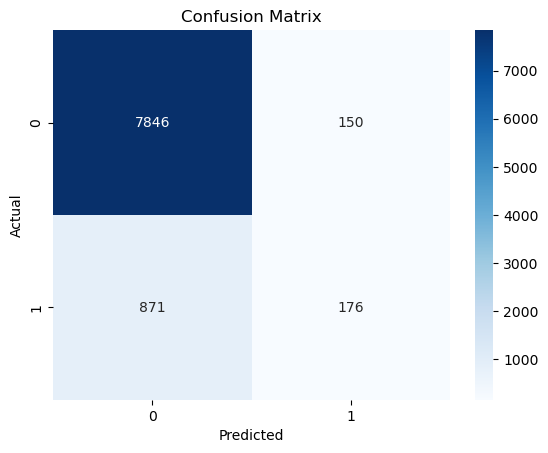

In [58]:
# create confusion matrix

lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [59]:
# Random Forest Classifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfy_pred = rfc.predict(X_test)

print("RandomForestClassifier")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:",  f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

RandomForestClassifier
Accuracy: 0.9097644586973349
Precision: 0.6629055007052186
Recall: 0.448901623686724
F1-score: 0.5353075170842825
AUC-ROC: 0.7095058393571189


ANALYSIS
-The accuracy at 90% indicates that the model performs well in predicting whether a customer will make a deposit or not, which is beneficial for the Bank in efficiently identifying potential depositors.

-The model can correctly identify approximately 66.3% of the predicted deposits out of all instances predicted as positive. 

-The RFC model can correctly identify the recall value at around 44.9% of the actual positive which is the deposit. This is very low as a higherhigher recall value By capturing a higher proportion of actual deposits, the bank can improve its customer acquisition and retention strategies.

-The F1-score is at 54%, it suggests a moderate balance between correctly predicting deposits and minimizing false positives.

-The AUC-ROC score of 71% indicates that the Random Forest model has a good ability to discriminate between positive and negative instances. This metric is valuable for Nexux Bank in assessing the effectiveness of their marketing campaigns and customer targeting strategies. Improving the AUC-ROC score can enhance the bank's ability to identify potential depositors and optimize its operations.

Overall, the Random Forest Classifier model shows promising results with high accuracy and precision. It demonstrates the potential to improve the Bank's efficiency in acquiring deposits, optimizing operations, and mitigating risks.

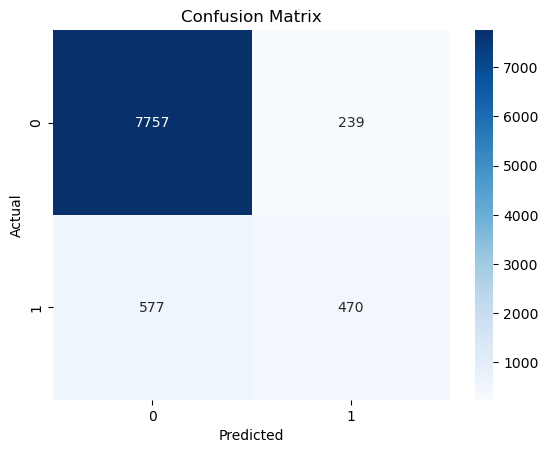

In [60]:
# create confusion matrix

rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [75]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

dty_pred = dtc.predict(X_test)

print("DecisionTreeClassifier")
print("Accuracy:", accuracy_score(y_test, dty_pred))
print("Precision:", precision_score(y_test, dty_pred))
print("Recall:", recall_score(y_test, dty_pred))
print("F1-score:",  f1_score(y_test, dty_pred))
print("AUC-ROC:", roc_auc_score(y_test, dty_pred))

DecisionTreeClassifier
Accuracy: 0.8758155479376313
Precision: 0.4643527204502814
Recall: 0.47277936962750716
F1-score: 0.46852815901561756
AUC-ROC: 0.7006843321374153


ANALYSIS
-The accuracy of 87% shows that the Decision Tree model can correctly classify around 87.7% of the instances. 

-The DT model can correctly identify approximately 46% of the predicted deposits out of all instances predicted as positive. 

-The recall value is 47% implies that the model can correctly identify around 47.9% of the actual positive instances (deposits). This metric is crucial for Nexus Bank to ensure they do not miss out on potential depositors. By capturing a higher proportion of actual deposits, the bank can improve its customer acquisition and retention strategies.

-The F1-score is 47%. The F1-score suggests a moderate balance between correctly predicting deposits and minimizing false positives.

-The AUC-ROC score of 70% indicates that the Decision Tree model has a good ability to discriminate between positive and negative instances

Overall, the Decision Tree Classifier model shows reasonable results with decent accuracy and precision. It demonstrates the potential to improve Nexus Bank's efficiency in acquiring deposits, optimizing operations, and mitigating risks. However, the model's performance is slightly lower compared to the Random Forest Classifier. 

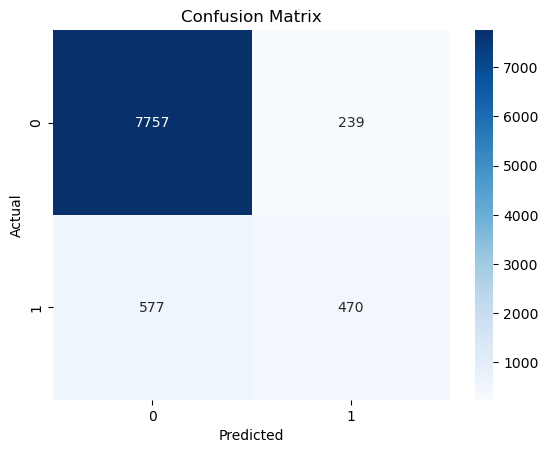

In [62]:
# create confusion matrix

dcm = confusion_matrix(y_test, dty_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

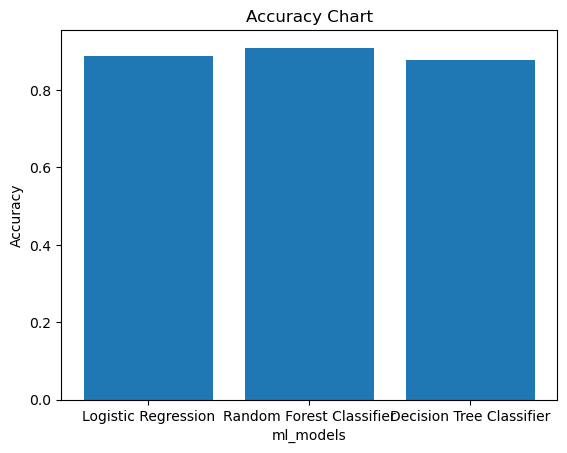

In [67]:
ml_models = ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier']
accuracy = [0.887, 0.910, 0.877]
precision = [0.540, 0.661, 0.470]
recall = [0.168, 0.449, 0.480]
f1_score = [0.256, 0.535, 0.475]
auc_roc = [0.575, 0.710, 0.704]

plt.bar(ml_models, accuracy)
plt.xlabel('ml_models')
plt.ylabel('Accuracy')
plt.title('Accuracy Chart')
plt.show()


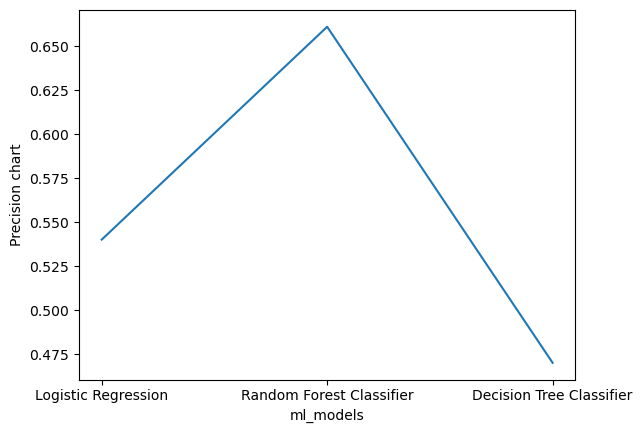

In [69]:
# Plotting precision
plt.plot(models, precision)
plt.xlabel('ml_models')
plt.ylabel('Precision chart')
plt.show()


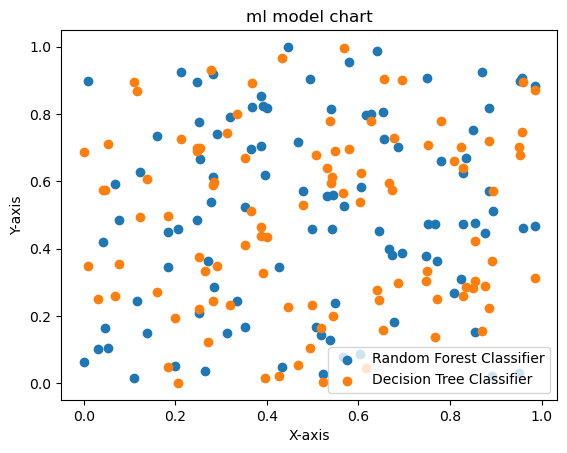

In [70]:
x = np.random.rand(100)
y1 = np.random.rand(100)
y2 = np.random.rand(100)

plt.scatter(x, y1, label='Random Forest Classifier')
plt.scatter(x, y2, label='Decision Tree Classifier')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('ml model chart')
plt.legend()
plt.show()


### CONCLUSION


Based on accuracy, precision, recall, F1 score, and AUC-ROC metrics, the random forest classifier model achieved the best performance among the three selected models. The RFC model is the best for predicting customer deposit probabilities based on the given dataset and achieving the business goals of the Bank, such as acquiring more deposits, optimizing operations, and mitigating risks.

-The higher accuracy, precision, recall, F1-score, and AUC-ROC score of the Random Forest Classifier indicated its superior performance in predicting customer deposits. This means the model can more accurately identify potential depositors, which aligns with the bank's business goal of attracting more deposits.

-The RFC's ability to accurately predict deposit probabilities can also aid Nexux Bank in mitigating risks. By identifying customers who are more likely to make deposits, the bank can assess their creditworthiness, make informed lending decisions, and reduce the risk of loan defaults or credit card payment defaults.

-The selection of the RFC model as the best performing model shows that the analysis provided valuable insights and solutions that benefit banks. Nexux can achieve their growth, efficiency and profitability goals by streamlining operations, improving marketing campaigns, reducing risk and increasing customer deposits. 